## Background
Leveraging HR data can help inform and improve the strategies used by HR and that is including recruitment, training and development, compensation and even turnover rates. This chosen HR dataset is specifically focusing on the organization turnover rates and what constitute to the consequences. 

More on how the data was collected, the organization HR conducted a survey on their employees and the survey is designed carefully to reveal great deal of information about them. For instance, the HR can tell whether the employee would prioritize family versus working hours or job position vs income. Next is to link to their job satisfaction and here come the main question: are they still working for the company?

In this sense, the researcher can potentially evaluate employee’s decision to leave or stay in the company with a predictive model. Further emphasis, the aim of this project is not based on subjective point of view where HR would think “the employee left because the job is not good” but on an objective insights which is reflecting on employee’s opinion and their job experience.

## HR Dataset
Exploring the dataset, there are a total of 35 columns and close to 1500 rows. The number of columns are consider good which could open up to a lot of possible analysis. The dataset contains employee’s background and work-related activities. 

## Task
Our approach here is to develop a predictive model to predict who will be likely to resign. 
This allows HR to act quicker to retain the employee rather than to find out the reason after the exit 
interview. That will be too late!


## Predictive Model Workflow
* Data Pre-Processing – Handle missing values, remove variables, bin variables such as the job satisfaction level. Detect the outliers which is the odd one out and identify them. 

* Early Data Analysis – Identify 2 groups of employees who stay or had resign. To better understand both group decisions of whether is because of income, working hours, etc.

* Model Training – Supervised training. Manage imbalance dataset (80% test and 20% accuracy). Using N Naïve Bayes, k-nearest neighbors algorithm and random forest to train and text. Objective here is to form 3 themes to train such as old age, overtime and salary or all three combinations. 

* Model Validation – Using K-Fold/Confusion Metric techniques to validate how good is the model 

* Model Predictions – After the best model selected, generate the outcome and do tuning to the best interest of the results

* Conclusion and recommendation – Focus on which employees are leaving and why. 


## Read HR Dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree 
from sklearn import tree

In [2]:
HRDATA = pd.read_csv('Dataset_(Lim Swee Ming).csv')

In [3]:
HRDATA.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

In [4]:
HRDATA.shape #(Rows, Columns)

(1470, 35)

In [5]:
HRDATA.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [6]:
HRDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

-----------------------------------------------------------------

## Data Pre-Processing

In [7]:
#Check Missing Data

HRDATA.isnull().sum().to_frame('No. of Nulls')

No. of Nulls
Age                                  0
Attrition                            0
BusinessTravel                       0
DailyRate                            0
Department                           0
DistanceFromHome                     0
Education                            0
EducationField                       0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobRole                              0
JobSatisfaction                      0
MaritalStatus                        0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
Over18                               0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0

In [8]:
# Remove unwanted columns

HRDATA.drop(['Over18', 'StandardHours', 'StockOptionLevel', 'EmployeeNumber', 'EmployeeCount'], inplace=True, axis=1)

In [9]:
HRDATA.head().T

0                       1  \
Age                                    41                      49   
Attrition                             Yes                      No   
BusinessTravel              Travel_Rarely       Travel_Frequently   
DailyRate                            1102                     279   
Department                          Sales  Research & Development   
DistanceFromHome                        1                       8   
Education                               2                       1   
EducationField              Life Sciences           Life Sciences   
EnvironmentSatisfaction                 2                       3   
Gender                             Female                    Male   
HourlyRate                             94                      61   
JobInvolvement                          3                       2   
JobLevel                                2                       2   
JobRole                   Sales Executive      Research Scientist   
JobSatisfaction                         4                       2   
MaritalStatus                      Single                 Married   
MonthlyIncome                        5993                    5130   
MonthlyRate                         19479                   24907   
NumCompaniesWorked                      8                       1   
OverTime                              Yes                      No   
PercentSalaryHike                      11                      23   
PerformanceRating                       3                       4   
RelationshipSatisfaction                1                       4   
TotalWorkingYears                       8                      10   
TrainingTimesLastYear                   0                       3   
WorkLifeBalance                         1                       3   
YearsAtCompany                          6                      10   
YearsInCurrentRole                      4                       7   
YearsSinceLastPromotion                 0                       1   
YearsWithCurrManager                    5                       7   

                                               2                       3  \
Age                                           37                      33   
Attrition                                    Yes                      No   
BusinessTravel                     Travel_Rarely       Travel_Frequently   
DailyRate                                   1373                    1392   
Department                Research & Development  Research & Development   
DistanceFromHome                               2                       3   
Education                                      2                       4   
EducationField                             Other           Life Sciences   
EnvironmentSatisfaction                        4                       4   
Gender                                      Male                  Female   
HourlyRate                                    92                      56   
JobInvolvement                                 2                       3   
JobLevel                                       1                       1   
JobRole                    Laboratory Technician      Research Scientist   
JobSatisfaction                                3                       3   
MaritalStatus                             Single                 Married   
MonthlyIncome                               2090                    2909   
MonthlyRate                                 2396                   23159   
NumCompaniesWorked                             6                       1   
OverTime                                     Yes                     Yes   
PercentSalaryHike                             15                      11   
PerformanceRating                              3                       3   
RelationshipSatisfaction                       2                       3   
TotalWorkingYears                              7                       8   


In [10]:
HRDATA.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)

## Early Data Exploration


#### Checking Imbalance Class Distribution

In [11]:
# The no. of employees who left vs employee who stay

HRDATA["Attrition"].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

#### What is the company turnover rate (%)

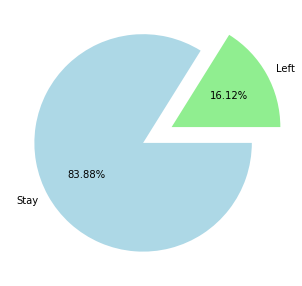

In [12]:
%matplotlib inline

left = len(HRDATA[HRDATA["Attrition"] == "Yes"])
stay = len(HRDATA[HRDATA["Attrition"] == "No"])

values = [left,stay]
labels = ["Left","Stay"]
colors = ['lightgreen','lightblue']
explode = [0.3,0]
fig = plt.figure(figsize = (5,5))
pie = plt.pie(values, labels = labels, colors = colors, explode = explode, autopct = '%4.2f%%')

#83% stayed while 16% left - Imabalance

**Observations:** Now we are looking at the turnover rate of the company in %. There are 16% who have left and 83% of them who are still in this organization. 

#### Find out the average employee's satisfaction and other features who had left compared with employee who stayed

In [13]:
Comparison = HRDATA.groupby('Attrition')
Comparison.mean().T

Attrition                           No           Yes
Age                          37.561233     33.607595
BusinessTravel                1.056772      1.240506
DailyRate                   812.504461    750.362869
DistanceFromHome              8.915653     10.632911
Education                     2.927007      2.839662
EnvironmentSatisfaction       2.771290      2.464135
HourlyRate                   65.952149     65.573840
JobInvolvement                2.770479      2.518987
JobLevel                      2.145985      1.637131
JobSatisfaction               2.778589      2.468354
MonthlyIncome              6832.739659   4787.092827
MonthlyRate               14265.779400  14559.308017
NumCompaniesWorked            2.645580      2.940928
PercentSalaryHike            15.231144     15.097046
PerformanceRating             3.153285      3.156118
RelationshipSatisfaction      2.733982      2.599156
TotalWorkingYears            11.862936      8.244726
TrainingTimesLastYear         2.832928      2.624473
WorkLifeBalance               2.781022      2.658228
YearsAtCompany                7.369019      5.130802
YearsInCurrentRole            4.484185      2.902954
YearsSinceLastPromotion       2.234388      1.945148
YearsWithCurrManager          4.367397      2.852321

**Observations:** You can see the table of the average, comparing with the ones who left and stayed.
According to the table, we can tell that the employees who have lefted have less environmental satisfaction, lower job level position and monthly income compared to the ones who are still working here.

#### Visualize which department has the highest turnover

In [14]:
HRDATA['Resigned'] = HRDATA["Attrition"] == "Yes"

In [15]:
HRDATA['Resigned'] 

0        True
1       False
2        True
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Resigned, Length: 1470, dtype: bool

In [16]:
#True/false to binary

HRDATA.Resigned.replace({True:1 , False:0} , inplace=True)

In [17]:
HRDATA['Resigned'] 

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Resigned, Length: 1470, dtype: int64

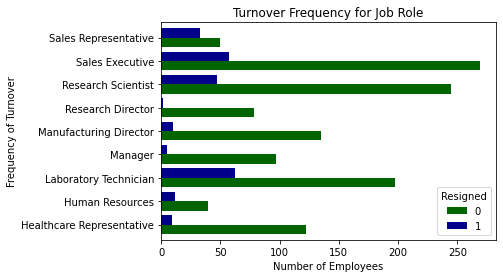

In [18]:
pd.crosstab(HRDATA.JobRole,HRDATA.Resigned).plot(kind='barh', width=0.8, color=('darkgreen','darkblue'))
plt.title('Turnover Frequency for Job Role')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

#This is a visualization graph where we can understand which job role has the highest turnover rate. It turns out that it is the ‘Sales Representative’ designation while the company’s Sales Executive position has the lowest turnover. 
#It is also can be observed that the higher the job position, the less likely they will resign. 

**Observations:** This is a visualization graph where we can understand which job role has the highest turnover rate. It turns out that it is the ‘Sales Representative’ designation while the company’s Sales Executive position has the lowest turnover. 

It is also can be observed that the higher the job position, the less likely they will resign. 


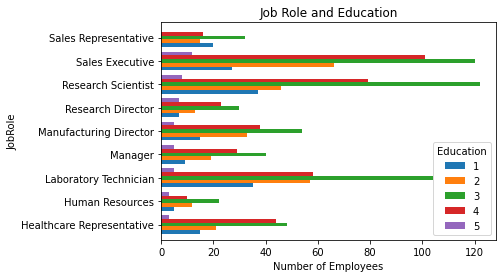

In [19]:
pd.crosstab(HRDATA.JobRole,HRDATA.Education).plot(kind='barh', width=0.8)
plt.title('Job Role and Education')
plt.xlabel('Number of Employees')
plt.savefig('department_bar_chartMonthlyIncome')

#The sales representative with their education level, they came in with a bachelor degree. HR may consider hiring a lower education background for this role. 


#### Identity the factors that have a direct impact to causing employee to leave

In [20]:
factors = HRDATA[['Age','DistanceFromHome','MonthlyIncome', 'PerformanceRating', "RelationshipSatisfaction", "PerformanceRating", 'JobLevel', 'JobSatisfaction','Resigned']]

<AxesSubplot:>

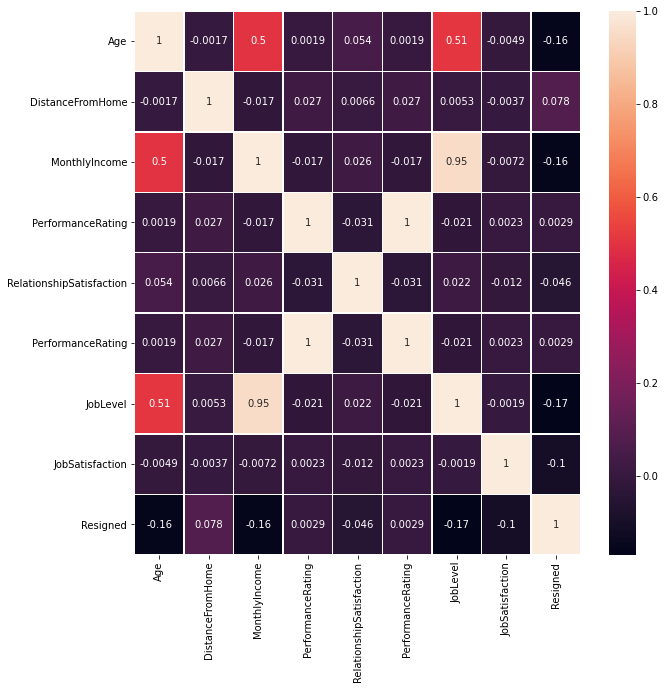

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(factors.corr(), annot=True, linewidths=.5)

#a correlation to provide an insight of which factors that are likely affecting an employee's resignation decision.


**Oberservations:** A correlation to provide an insight of which factors that are likely affecting an employee's resignation decision.

Text(0.5, 1.0, 'Age Vs Resignation')

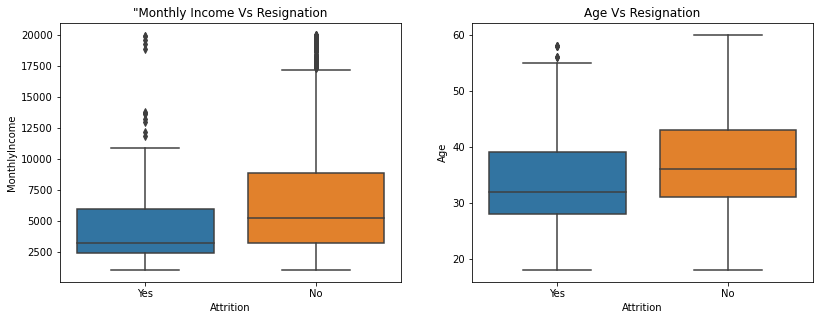

In [22]:
figure_size = (12, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figure_size)
fig.tight_layout(pad=4.0)

#Is resignation affected by monthly income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=HRDATA, ax=axs[0]).set_title('"Monthly Income Vs Resignation')

#Is resignation affected by age
sns.boxplot(x='Attrition', y='Age', data=HRDATA, ax=axs[1]).set_title("Age Vs Resignation")

#From the observation, yes there is some influence of employee having lower income will more likely resign vs the higher income earners. 
#Younger age will be more likely to resign

<AxesSubplot:title={'center':'Age Vs Resignation'}, xlabel='Age', ylabel='count'>

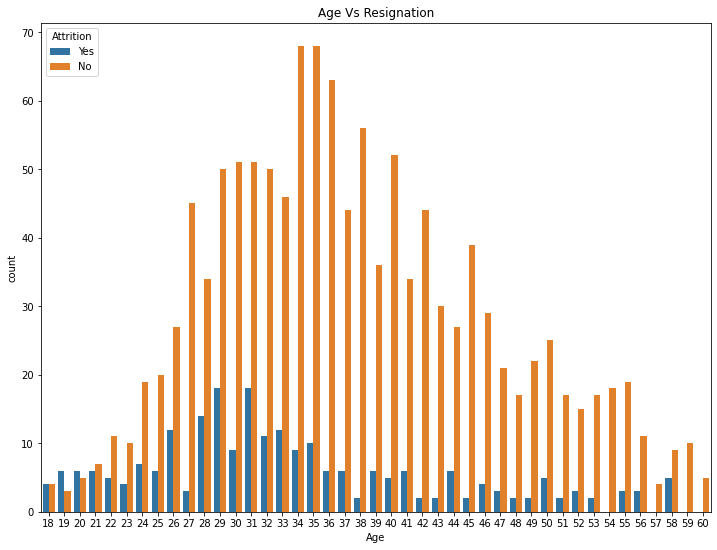

In [23]:
plt.subplots(figsize=(12,9))
plt.title("Age Vs Resignation")
sns.countplot(x='Age',hue='Attrition',data=HRDATA)

#From the observation, the younger employees  18 - 25 tends to leave the company while 30 are less likely to leave the company.
#HR should focus on how to retain younger employees.

**Observations:** From the graph, we can tell that younger employees belonging to the age group of 18 - 25 are more likely to leave the company and employees who age 30 & above are less likely to leave. 


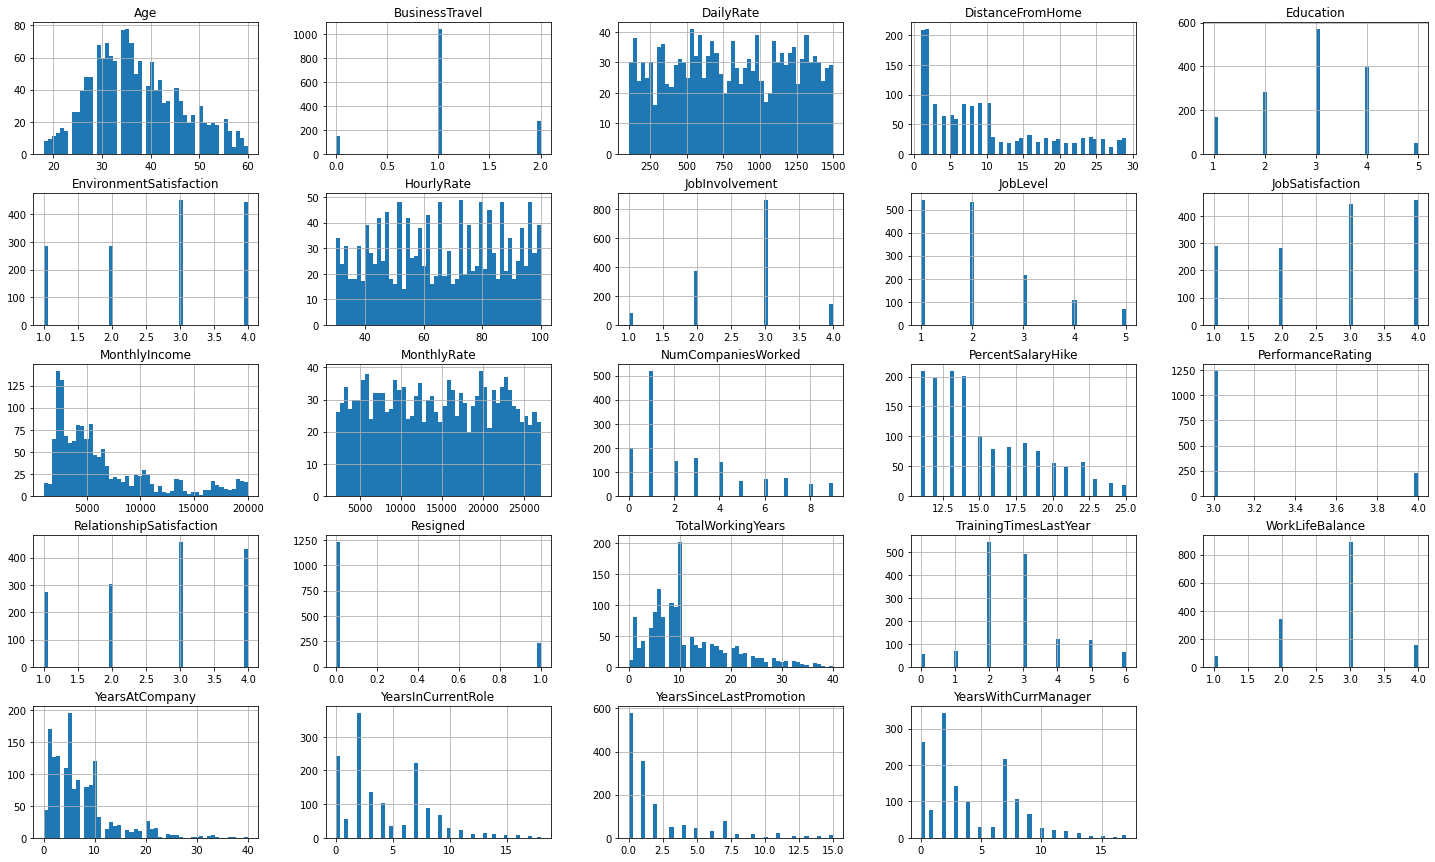

In [24]:
HRDATA.hist(bins=50, figsize=(25,15))
plt.show()

### Insights from above:

• More employees belong to the age group of 30 - 40
<br> 
• There are many opportunities for business trips. More than half of the employees travel
<br> 
• Majority of employees stay near office
<br>
• Most emploeyees are holding a Bachelor's degree and master
<br>
• Most employees are satisfied with the work environment
<br>
• Most employees has high involvement in their job
<br>
• There are 70% lower tier employees 
<br>
• In total, there are 1477 employees. Nearly 600 employees are not satified with their job. 
<br>
• Since there are many lower tier employees, the salary range is between 300 - 5000
<br>
• Most receive up to 15% salary hike
<br>
• Performance rating has high imbalance. Managers might find that most employees are underperforming.
<br>
• The Relationship Satisfaction is decent. 
<br>
• Most received decent amount of training times last year
<br>
• Most feel that they have work life balance

<br>
Most employees experienced career stagnation, not much promotion going on but people are not leaving this company. 
<br>

## Training ML Models

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Create train and train dataset

In [26]:
# create feature & response variables

features = ['Age','MonthlyIncome','DistanceFromHome', 'PerformanceRating', "RelationshipSatisfaction", 'JobLevel', 'JobSatisfaction']

X = HRDATA[features]
Y = HRDATA["Attrition"]

In [27]:
# Create train & test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#in the train and test set, it is set to train it as 80% to fit the machine learning model and 20% as test to evaluate the fit machine learning model.


In [28]:
Y_test.value_counts()

No     236
Yes     58
Name: Attrition, dtype: int64

In [29]:
Y_test.value_counts()[0]/len(Y_test)

0.8027210884353742

In [30]:
len(X_train)

1176

#### **MODEL TRAINING** with Naive Bayes, K-NN and Decision Tree

Reason for choosing Naive Bayes - Naive bayes perform better with low amounts of data and doesnt contain all possibilities where noises are eliminated effectively.

Reason for choosing K-NN - K-NN classify new classes based on similarity measures which is very useful to understand the group of people who already resigned. 

Reason for choosing Decision Tree - Decision Tree provides quick understanding of a flow chart to visualize what lead resigning decision.

In [31]:
# train Naive Bayes Model
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, Y_train)

Y_pred_NB = NBclassifier.predict(X_test)

# train K-NN Model
knn = KNeighborsClassifier(n_neighbors = 5, p = 2) 
knn.fit(X_train, Y_train)

Y_pred_KNN = knn.predict(X_test)


# train Decision Tree Model
Dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
Dtree.fit(X_train, Y_train)

Y_pred_Dtree = Dtree.predict(X_test)


print('\033[1m' + 'Get Accuracy Score' + '\033[0m')
print("")
print("")

NB = accuracy_score(Y_pred_NB, Y_test)
print("Naive Bayes Accuracy Score:", NB)

print("===========================================")

KNN = accuracy_score(Y_pred_KNN, Y_test)
print("K-Nearest Neighbour Accuracy Score:", KNN)

print("===========================================")

Dtree = accuracy_score(Y_pred_Dtree, Y_test)
print ("Decision Tree Accuracy Score:", Dtree)

print("")
print("")
print('\033[1m' + 'Get Recall Score' + '\033[0m')
print("")
print("")

NB_recall = recall_score(Y_pred_NB, Y_test, pos_label="No")
print("Naive Bayes Recall Score:", NB_recall)

print("===========================================")

KNN_recall = recall_score(Y_pred_KNN, Y_test, pos_label="No")
print("K-Nearest Neighbour Recall Score:", KNN_recall)

print("===========================================")

Dtree_recall = recall_score(Y_pred_Dtree, Y_test, pos_label="No")
print("Decision Tree Recall Score:", Dtree_recall)


Dtree_recall = recall_score(Y_pred_Dtree, Y_test, pos_label="No")

print("")
print("")
print('\033[1m' + 'Evaluate with Confusion Matrix' + '\033[0m')
print("")
print("")


print("===========================================")
print ("1. Naive Bayes confusion matrix result:")
NB_confusion = confusion_matrix(Y_pred_NB, Y_test)
NB_confusion_Set = pd.DataFrame(NB_confusion, columns = ['True','False'], index = ['Positive','Negative'])
print(NB_confusion_Set)


print("")
print("===========================================")
print ("2. K-Nearest Neighbour confusion matrix result:")
KNN_confusion = confusion_matrix(Y_pred_KNN, Y_test)
KNN_confusion_Set = pd.DataFrame(KNN_confusion, columns = ['True','False'], index = ['Positive','Negative'])
print(KNN_confusion_Set)

print("")
print("===========================================")
print ("3. Decision Tree confusion matrix result:")

Dtree_confusion = confusion_matrix(Y_pred_Dtree, Y_test)
Dtree_confusion_Set = pd.DataFrame(Dtree_confusion, columns = ['True','False'], index = ['Positive','Negative'])
print(Dtree_confusion_Set)

#The algorithms selected Naive Bayes, K-Nearest Neighbour and decision tree. 
#Now with the performance metrics implemented. The outcome is observed that Naive Bayes has demonstrated a better score than the rest. 
#For the confusion matrix in Naive Bayes,it has demonstrated higher True Positive and True Negatives values while less incorrect values.

#Naive Bayes may have performed better in this case because this dataset is not exactly huge
#and doesnt contain all possibilities and thats where noises are eliminated effectively.

Get Accuracy Score


Naive Bayes Accuracy Score: 0.7993197278911565
K-Nearest Neighbour Accuracy Score: 0.7653061224489796
Decision Tree Accuracy Score: 0.7857142857142857


Get Recall Score


Naive Bayes Recall Score: 0.8149466192170819
K-Nearest Neighbour Recall Score: 0.8036363636363636
Decision Tree Recall Score: 0.8013937282229965


Evaluate with Confusion Matrix


1. Naive Bayes confusion matrix result:
          True  False
Positive   229     52
Negative     7      6

2. K-Nearest Neighbour confusion matrix result:
          True  False
Positive   221     54
Negative    15      4

3. Decision Tree confusion matrix result:
          True  False
Positive   230     57
Negative     6      1


**Observations:** So for this case, this is a classification and supervised learning, so I am using the classification algorithm models. Before training and testing the dataset, I included the important features. After, In the train and test set, it is set to train it as 80% to fit the machine learning model and 20% as test to evaluate the fit machine learning model.

The algorithms selected Naive Bayes, K-Nearest Neighbour and decision tree. Now with the performance metrics implemented. The outcome is observed that Naive Bayes has demonstrated a better score than the rest. For the confusion matrix in Naive Bayes,it has demonstrated higher True Positive and True Negatives values while less incorrect values.

Naive Bayes may have performed better in this case because this dataset is not exactly huge and doesnt contain all possibilities and thats where noises are eliminated effectively.

In [34]:
Y_pred_Dtree.shape, Y_test.shape

((294,), (294,))

In [35]:
# train Decision Tree Model
Dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
Dtree.fit(X_train, Y_train)

Y_pred_Dtree = Dtree.predict(X_test)


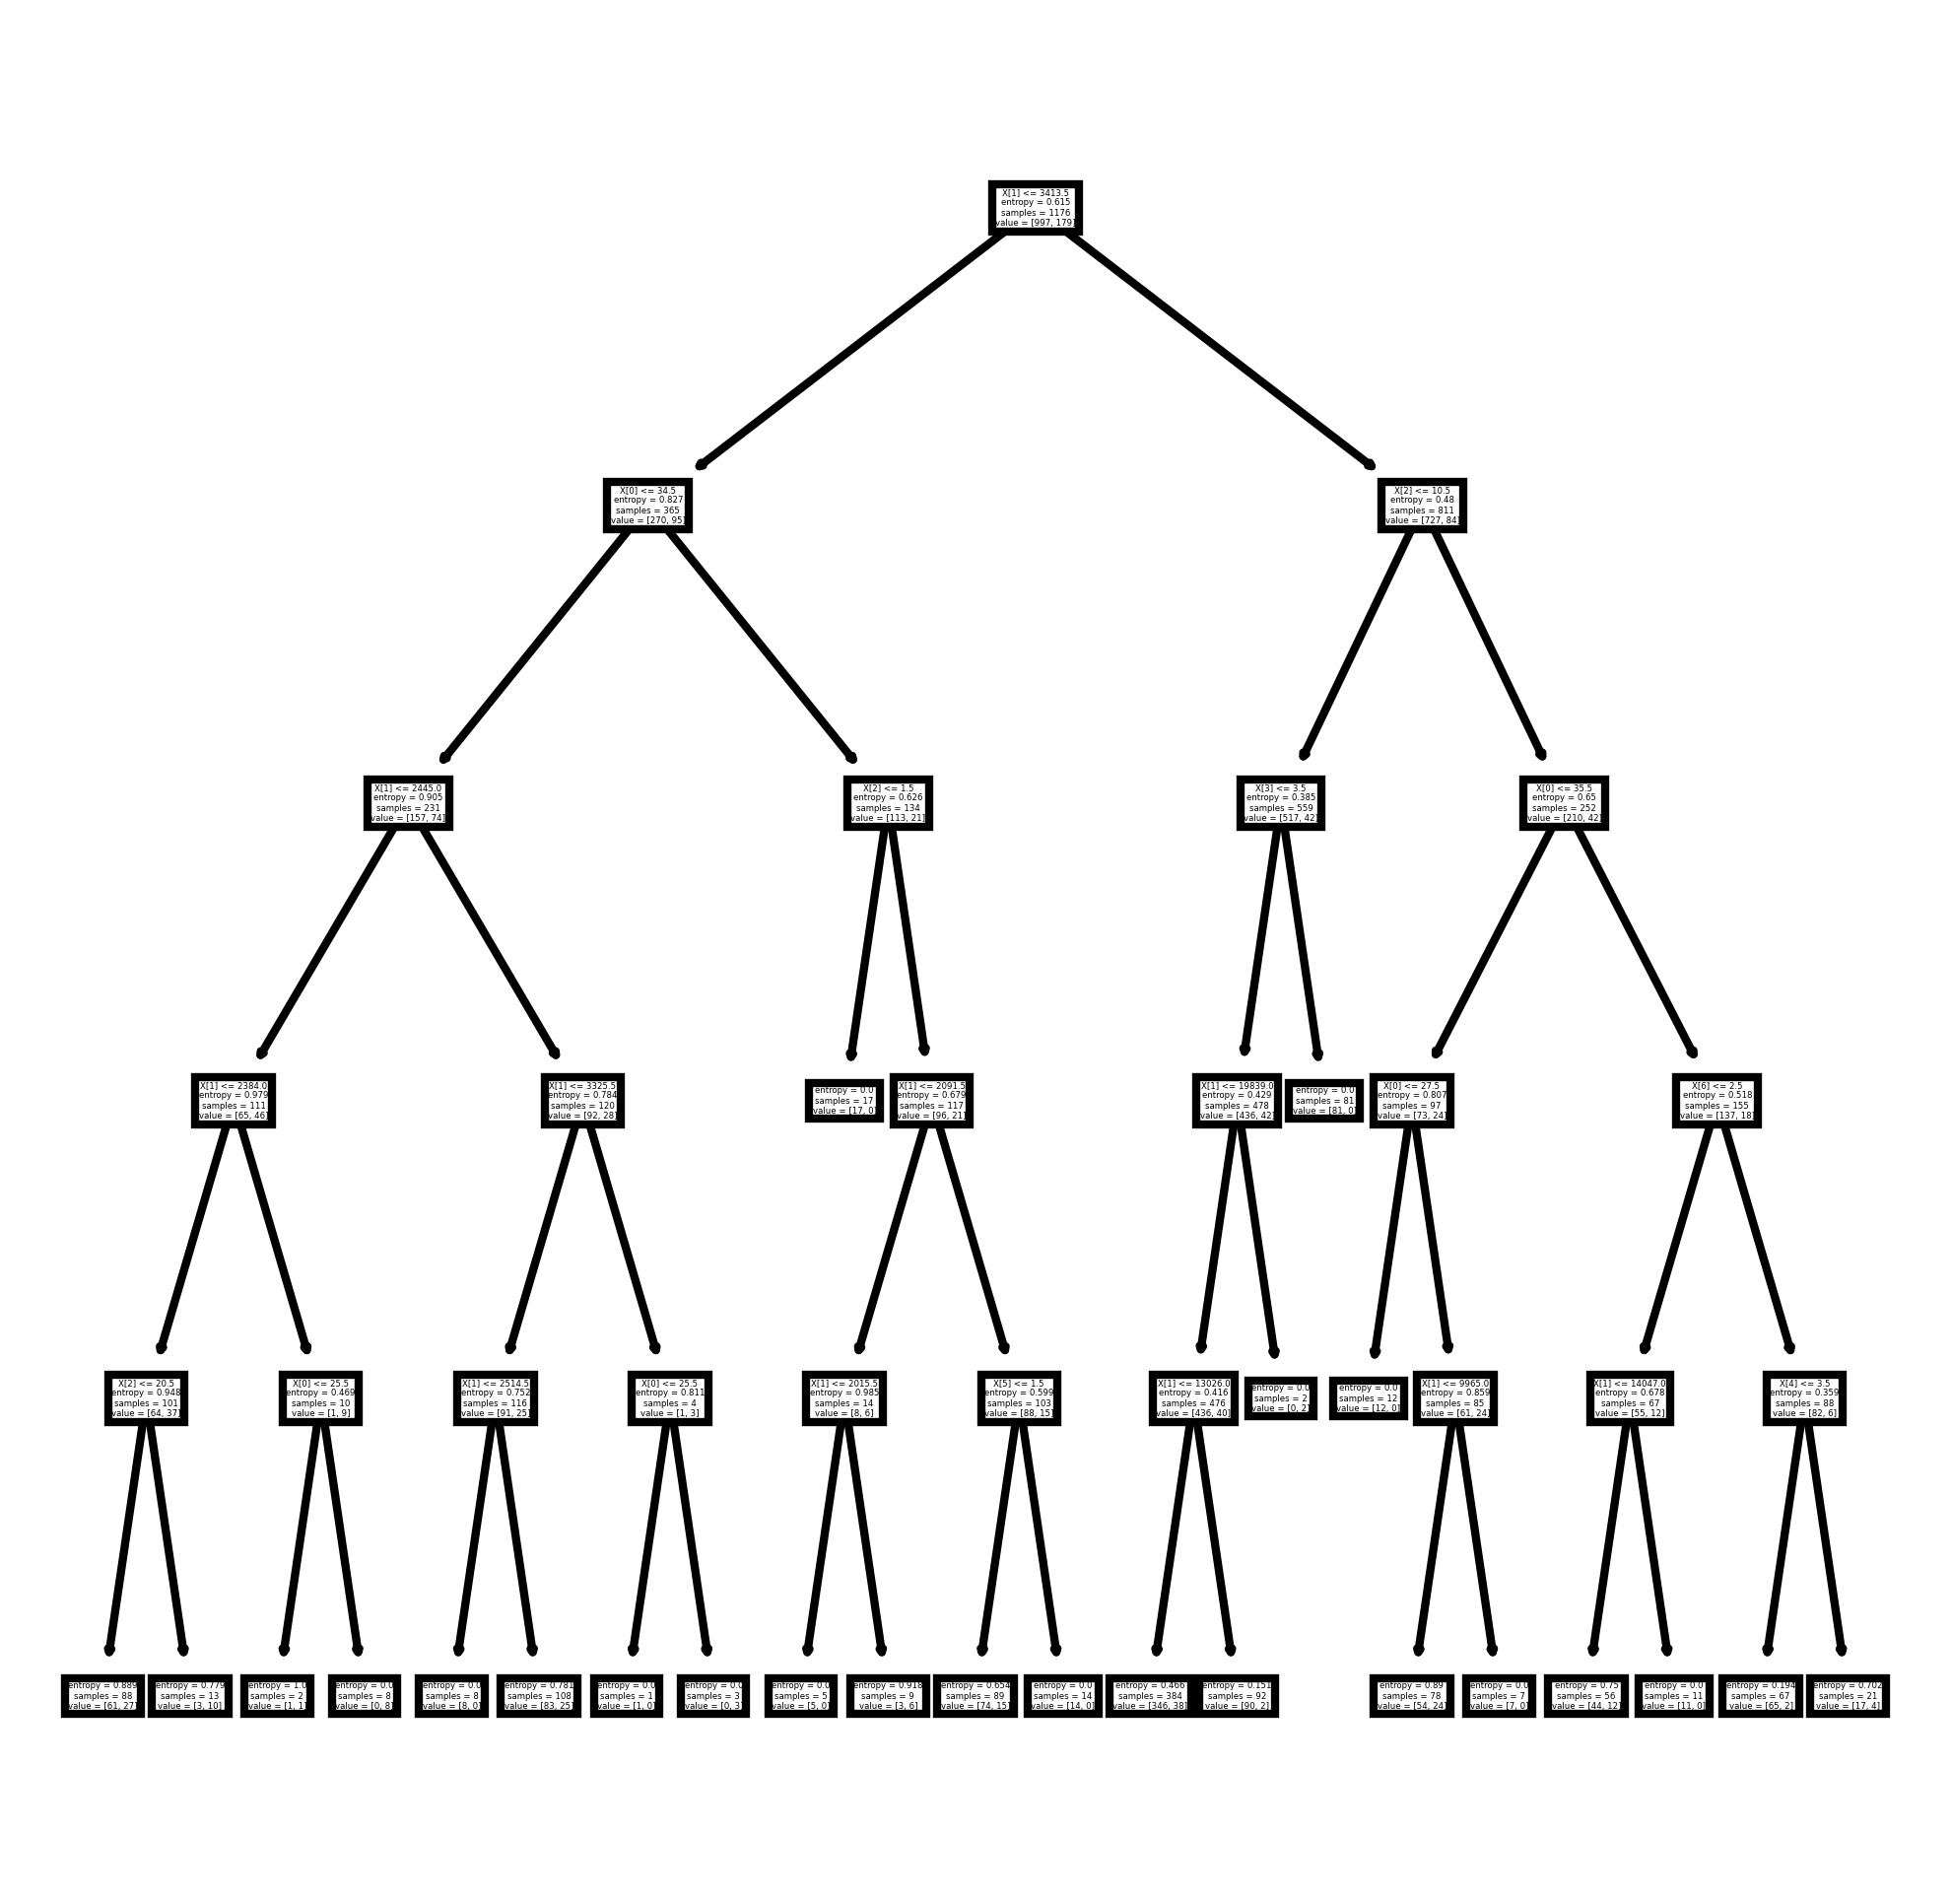

In [36]:
# plotting decision tree
from sklearn.tree import plot_tree 

# Setting dpi = 600 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)

plot_tree(Dtree);

fig.savefig('imagename.png')

#A glance at the decision 3 with a max depth of 5

## Max Voting - Just another method of what I did above

In [37]:
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []

NB_model = GaussianNB()
estimators.append(('Naive Bayes', NB_model))

KNN_model = KNeighborsClassifier()
estimators.append(('K Nearest Neighbors', KNN_model))

Dtree_model = DecisionTreeClassifier()
estimators.append(('Decision Tree', Dtree_model))

In [38]:
for i in (NB_model, KNN_model, Dtree_model):
    
    # train each individual model
    i.fit(X_train, Y_train)
    
    # predict on test set
    Y_pred = i.predict(X_test)
    
    # print accuracy results
    print(i, recall_score(Y_test, Y_pred, pos_label="No"))

GaussianNB() 0.9703389830508474
KNeighborsClassifier() 0.9364406779661016
DecisionTreeClassifier() 0.7796610169491526


In [39]:
# Using VotingClassifier() to build ensemble model with Hard Voting

ensemble_model = VotingClassifier(estimators)

ensemble_model.fit(X_train,Y_train)

predicted_labels = ensemble_model.predict(X_test)            

print("Recall using Hard Voting: ", recall_score(Y_test, predicted_labels, pos_label="No"))

#Now we use Vote Classifier, and it performs slightly better than k-nearest neighbour but it did not achieve higher than Naive bayes.

Recall using Hard Voting:  0.961864406779661


In [40]:
ensemble_model

VotingClassifier(estimators=[('Naive Bayes', GaussianNB()),
                             ('K Nearest Neighbors', KNeighborsClassifier()),
                             ('Decision Tree', DecisionTreeClassifier())])

**Observations:** So I have trained a few classifiers. Now there is a ensemble method called Max Voting where I can use all the multiple classifiers to make predictions. 

The purpose is to reduce the prediction error and seek better performance. So again, Naive Bayes scored better and would be considered as voted to use. 

Now we use Vote Classifier, and it performs slightly better than k-nearest neighbour but it did not achieve higher than Naive bayes.



## **SEPERATE MODEL TRAINING** (RandomForest)


Reason for choosing Random Forest - Given the functionaility of this algorithim enable to insert 3 different models and run on random forest.

In [41]:
NBclassifier = GaussianNB()
NB = NBclassifier.fit(X_train, Y_train)

NB_predictions = NB.predict_proba(X_test)

print(NB_predictions)

[[7.44909967e-01 2.55090033e-01]
 [5.80189942e-01 4.19810058e-01]
 [5.64044850e-01 4.35955150e-01]
 [7.38823371e-01 2.61176629e-01]
 [9.79685543e-01 2.03144571e-02]
 [6.36639027e-01 3.63360973e-01]
 [9.94847536e-01 5.15246439e-03]
 [8.58545445e-01 1.41454555e-01]
 [9.51541130e-01 4.84588698e-02]
 [7.37989916e-01 2.62010084e-01]
 [9.98297511e-01 1.70248877e-03]
 [9.67906424e-01 3.20935756e-02]
 [6.70735719e-01 3.29264281e-01]
 [7.23165015e-01 2.76834985e-01]
 [7.29497994e-01 2.70502006e-01]
 [9.63737168e-01 3.62628319e-02]
 [8.07599539e-01 1.92400461e-01]
 [5.68930260e-01 4.31069740e-01]
 [2.90195693e-01 7.09804307e-01]
 [8.76157922e-01 1.23842078e-01]
 [8.60746585e-01 1.39253415e-01]
 [7.65855975e-01 2.34144025e-01]
 [8.85155173e-01 1.14844827e-01]
 [9.09164933e-01 9.08350667e-02]
 [6.79231057e-01 3.20768943e-01]
 [8.69612564e-01 1.30387436e-01]
 [7.71169467e-01 2.28830533e-01]
 [7.69907034e-01 2.30092966e-01]
 [6.90973828e-01 3.09026172e-01]
 [6.87502451e-01 3.12497549e-01]
 [6.133567

In [42]:
X_test

Age  MonthlyIncome  DistanceFromHome  PerformanceRating  \
1291   37           4213                10                  3   
1153   18           1569                 3                  3   
720    30           2132                22                  3   
763    34           2220                10                  3   
976    56          13402                23                  3   
...   ...            ...               ...                ...   
302    28           5661                16                  3   
443    22           3894                 4                  3   
701    53          14852                 2                  3   
309    31           4821                 5                  3   
845    40           4422                26                  3   

      RelationshipSatisfaction  JobLevel  JobSatisfaction  
1291                         2         2                1  
1153                         3         1                4  
720                          2         1                3  
763                          4         1                3  
976                          1         4                2  
...                        ...       ...              ...  
302                          3         2                1  
443                          3         1                3  
701                          3         4                3  
309                          3         1                4  
845                          4         2                4  

[294 rows x 7 columns]

In [43]:
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, p = 2) 
KNN = KNNclassifier.fit(X_train, Y_train)

KNN_predictions = KNN.predict_proba(X_test)

print(KNN_predictions)

[[1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]

In [44]:
Dtreeclassifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
Dtree = Dtreeclassifier.fit(X_train, Y_train)

Dtree_predictions = Dtree.predict_proba(X_test)

print(Dtree_predictions)

[[0.90104167 0.09895833]
 [0.69318182 0.30681818]
 [0.23076923 0.76923077]
 [0.69318182 0.30681818]
 [0.78571429 0.21428571]
 [1.         0.        ]
 [0.97826087 0.02173913]
 [1.         0.        ]
 [0.90104167 0.09895833]
 [0.90104167 0.09895833]
 [0.97826087 0.02173913]
 [1.         0.        ]
 [0.69318182 0.30681818]
 [0.76851852 0.23148148]
 [0.76851852 0.23148148]
 [0.90104167 0.09895833]
 [1.         0.        ]
 [0.76851852 0.23148148]
 [1.         0.        ]
 [0.90104167 0.09895833]
 [0.90104167 0.09895833]
 [0.76851852 0.23148148]
 [0.90104167 0.09895833]
 [0.69230769 0.30769231]
 [1.         0.        ]
 [0.90104167 0.09895833]
 [0.90104167 0.09895833]
 [1.         0.        ]
 [0.83146067 0.16853933]
 [0.76851852 0.23148148]
 [0.69230769 0.30769231]
 [0.90104167 0.09895833]
 [0.90104167 0.09895833]
 [0.69230769 0.30769231]
 [0.97014925 0.02985075]
 [0.83146067 0.16853933]
 [0.69230769 0.30769231]
 [0.90104167 0.09895833]
 [0.69318182 0.30681818]
 [0.90104167 0.09895833]


In [45]:
# Combine all 3 NB, KNN, DTree models to run on random forest

df1 = pd.DataFrame(NB_predictions)
df2 = pd.DataFrame(KNN_predictions)
df3 = pd.DataFrame(Dtree_predictions)


In [46]:
df1

0         1
0    0.744910  0.255090
1    0.580190  0.419810
2    0.564045  0.435955
3    0.738823  0.261177
4    0.979686  0.020314
..        ...       ...
289  0.643800  0.356200
290  0.632988  0.367012
291  0.995646  0.004354
292  0.782297  0.217703
293  0.752711  0.247289

[294 rows x 2 columns]

In [47]:
combine = df1.merge(df2, left_index=True, right_index=True,how='left').merge(df3, left_index=True, right_index=True,how='right')
combine

0_x       1_x  0_y  1_y         0         1
0    0.744910  0.255090  1.0  0.0  0.901042  0.098958
1    0.580190  0.419810  0.6  0.4  0.693182  0.306818
2    0.564045  0.435955  0.8  0.2  0.230769  0.769231
3    0.738823  0.261177  0.8  0.2  0.693182  0.306818
4    0.979686  0.020314  1.0  0.0  0.785714  0.214286
..        ...       ...  ...  ...       ...       ...
289  0.643800  0.356200  1.0  0.0  0.692308  0.307692
290  0.632988  0.367012  1.0  0.0  0.901042  0.098958
291  0.995646  0.004354  1.0  0.0  0.978261  0.021739
292  0.782297  0.217703  0.8  0.2  0.901042  0.098958
293  0.752711  0.247289  1.0  0.0  0.809524  0.190476

[294 rows x 6 columns]

In [48]:
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state =1) 
RF.fit(combine, Y_test)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [49]:
Y_pred_RF = RF.predict(combine)

In [50]:
RF_Ensemble = recall_score(Y_pred_RF,Y_test, pos_label="No")
print("RF Ensemble Result:", RF_Ensemble)

#this is best classifier compared to Naive Bayes

RF Ensemble Result: 0.9711934156378601


**Observations:** Now for the final part, we use Random Forest to see if it can beat Naive Bayes. Again, I combined multiple classifiers and fit into a random forest and calls for the result.

Random forest has better result than Naive Bayes hence we are going to hypertune random forest and to find out feature importance.


## Tuning with GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_dict1 = { 
               'max_depth' : [10,11,12,13] , 
               'criterion': ['gini','entropy'],
               'n_estimators': [10, 50 , 100]}

In [53]:
grid_model = GridSearchCV(estimator= RF, param_grid = param_dict1 , cv=5 , verbose= 1)

In [54]:
grid_model.fit(combine, Y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 13],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [55]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 13, 'n_estimators': 10}

In [56]:
#Before Tune

RF_Ensemble = recall_score(Y_pred_RF,Y_test, pos_label="No")
print("RF Ensemble Result:", RF_Ensemble)

RF Ensemble Result: 0.9711934156378601


In [57]:
#After Tuned

y_pred2 = grid_model.predict(combine)
print("Accuracy after tuned:", recall_score(y_pred2, Y_test, pos_label="No"))

#after tuning, we can see a increase of 0.4%

Accuracy after tuned: 0.975103734439834


**Observations:** After the Hyperparameter tuning, it has a 0.4% increase. Now we can move on to identify the features that can influence employee to quit. 


## Feature Importance

In [58]:
import plotly_express as px

col_sorted_by_importance=RF.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'Features':X.columns[col_sorted_by_importance],
    'Importance':RF.feature_importances_[col_sorted_by_importance]*100.0
})


px.bar(feat_imp, x='Features', y='Importance')

According to our Random Forest model, the above shows the most important features which influence whether an employee will leave the company, in ascending order. 

Turns out the Monthly Income and age has the highest percentage among all the features. Based on what we have observed earlier, the young ones are likely to quit and here we can say that it is because of the monthly income that did not satisfy them. 

#### Outcome & Recommendations:

Random Forest proves to be the best classifier to use and proceeded to the tuning stage where the model is optimized.  Next, is to feature the importance of which factors have impact for the resignation.

HR can take note the most importance factor is the Monthly income, followed by age, relationship factors, Job Level Etc.

HR can repackage their policies that attracts younger age group and revision of the monthly income and more activities that can improve relationship in the office.  
